In [1]:
########################################################
# Sites:
# 1 = Sandnes
# 2 = Iffiartafik
# 3 = Qoornoq
# 4 = Ersaa
# 5 = Kangeq
# 6 = all
# 7 = all_separate
#
# Types:
# Natural = 1
# Cultural = 2
# both = 3
#
# Variables:
#Variable,Title,Sheet,Column,xname,yname,depth
#1,Water content,Soil samples,32,% water,depth (cm),yes
#2,Water content,Soil samples,34,% water,depth (cm),yes
#3,pH,Soil samples,23,pH,depth (cm),yes
#6,Soil weight,Soil samples,9,weight (g),depth (cm),yes
#7,Remaining soil,Soil samples,19,weight (g),depth (cm),yes
#8,Waste,Soil samples,20,weight (g),depth (cm),yes
#10,Roots < 1mm,Roots,10,dry weight (g)/100cm3,depth (cm),yes
#11,Roots > 1 mm,Roots,11,dry weight (g)/100cm3,depth (cm),yes
#12,Horse tail,Roots,12,dry weight (g)/100cm3,depth (cm),yes
#13,Roots < 1mm - DW soil,Roots,21,dry weight g/ kg dry soil,depth (cm),yes
#14,Roots > 1 mm - DW soil,Roots,22,dry weight g/ kg dry soil,depth (cm),yes
#15,Horse tail - DW soil,Roots,23,dry weight g/ kg dry soil,depth (cm),yes
#16,Roots total excl HT,Roots,24,dry weight g/100cm3,depth (cm),yes
#17,Roots total incl HT,Roots,25,dry weight g/100cm3,depth (cm),yes
#20,Total biomass,Biomass,14,dry weight (g),none,no
#21,NDVI handheld,Biomass,19,ndvi,none,no
#22,LAI,Veg analysis,13,LAI,none,no
#30,Phosphorus-liquid,Olsen P,14,P (mg/l),depth (cm),yes
#31,Phosphorus-DWsoil,Olsen P,23,P (mg/kg DW),depth (cm),yes
#32,Phosphorus-vol,Olsen P,25,P (g P/m3),depth (cm),yes
#34,Phosphorus-DWsoil-gapf,Olsen P,27,P (mg/kg DW),depth (cm),yes
#35,Phosphorus-vol-gapf,Olsen P,28,P g/m3,depth (cm),yes
#40,NO3-liquid,Wet analysis,14,NO3 (ug/L),depth (cm),yes
#41,NH4-liquid,Wet analysis,23,NH4 (ug/L),depth (cm),yes
#42,TOC-liquid,Wet analysis,32,TOC (mg/L),depth (cm),yes
#43,TN-liquid,Wet analysis,41,TN (mg/L),depth (cm),yes
#44,DON-liquid,Wet analysis,50,DON (ug/L),depth (cm),yes
#45,NO3-DW soil,Wet analysis,22,NO3 (g/m2 DW),depth (cm),yes
#46,NH4-DW soil,Wet analysis,31,NH4 (g/m2 DW),depth (cm),yes
#47,TOC-DW soil,Wet analysis,40,TOC (g/m2 DW),depth (cm),yes
#48,TN-DW soil,Wet analysis,49,TN (g/m2 DW,depth (cm),yes
#49,DON-DW soil,Wet analysis,58,DON (g/m2 DW),depth (cm),yes
#50,N% total in soil,C N analysis,8,N% total,depth (cm),yes
#51,C% total in soil,C N analysis,9,C% total,depth (cm),yes
#52,N15‰ in soil,C N analysis,10,N‰,depth (cm),yes
#53,C13‰ PDB in soil,C N analysis,11,C‰ PDB,depth (cm),yes
#54,C_N ratio in soil,C N analysis,13,C/N ratio,depth (cm),yes
#55,N total in soil,C N analysis,16,N g/m3,depth (cm),yes
#60,Green uav,uav,4,Green,no
#61,Red uav,uav,5,Red,no
#62,Rededge uav,uav,6,Rededge,no
#63,Nir uav,uav,7,Nir,no
#64,NDVI uav,uav,8,NDVI,none,no
#65,OSAVI uav,uav,uav,9,OSAVI,none,no
#66,NDRE uav,uav,10,NDRE,none,no
#70,P mean,mix,6,P g/m$^3$,none,no

# plot modes:
# 1 = all plots

# 2 = pool natural/cultural plots together and plot mean
# 2.1 = add std as error plot
# 2.2 = add std as shaded area
# 2.3 = compact

# 3 = Scatter plot

# 4 = Scatter plot mean
# 4.1 = add std error bar on y-axis
# 4.2 = add std error bar on x-axis
# 4.3 = add std error bar on both axes

#########################################################


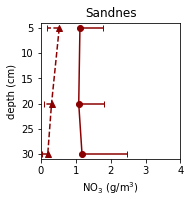

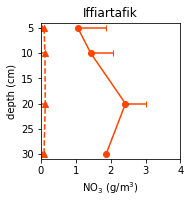

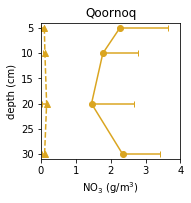

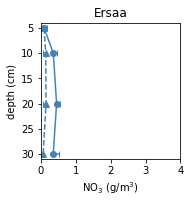

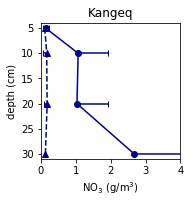

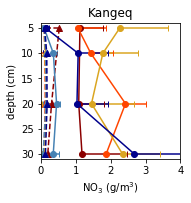

In [63]:
from plotfunctions import *
%matplotlib inline
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.47.xlsx'

sites = 7

types = 3
plotmode = 2.3

# variables:
variable1 = 45
mod1 = False
di1 = False

variable2 = 70
mod2 = False
di2 = False

# additional
# soil moisture: 80
# roots < 2 mm: 1
# roots > 2 mm: 0.2
# horsetail: 0.4
# phosphorus: 300
# NO3: 4
# NH4: 5
# TOC: 700
# TN: 70
# DOI: 60
# %N: 2.5
# %C: 50
# N15: 20
# C13: -
# C/N ratio: 25
# N content: 8000
xlim = 4

reg = True
savefig = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
#savefig = '/Users/rasmus/Desktop/temp'
#savefig = None

################
var1 = Variable(variable1, mod1, di1)
var2 = Variable(variable2, mod2, di2)
if sites == 7:
    for num in range(1,7):
        plot(inFile, num, types, var1, var2, plotmode, xlim, reg, savefig)
else:
    plot(inFile, sites, types, var1, var2, plotmode, xlim, reg, savefig)

In [52]:
from stattest import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.47.xlsx'
# t-test cultural vs natural
sites = 6
variable = 70
mod = False
di = False
#savetxt = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/cultural vs natural'
savetxt = None
printtxt = True
var = Variable(variable, mod, di)
################
ttest_stype(inFile, sites, var, savetxt, printtxt, equal_var=True)

P mean t-test
Natural vs Cultural

Sandnes
	t = -6.652     p = 0.000     n = 6     significant
Iffiartafik
	t = -3.261     p = 0.009     n = 6     significant
Qoornoq
	t = -4.915     p = 0.001     n = 6     significant
Ersaa
	t = -3.283     p = 0.009     n = 6     significant
Kangeq
	t = -8.816     p = 0.000     n = 6     significant


In [2]:
# t-test site1 vs site2
from plotfunctions import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.35.xlsx'
site1 = 1
site2 = 7
stype = 1
variable = 32
savetxt = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site'

################
if site1 <= 5 and site2 == 7:
    for site2 in range(1,6):
        ttest_site(inFile, site1, site2, stype, variable, savetxt=None, printtxt=False)
        
elif site1 == 7 and site2 == 7:
    for site1 in range(1,6):
        for site2 in range(1,6):
            ttest_site(inFile, site1, site2, 1, variable, savetxt=None, printtxt=False)
    for site1 in range(1,6):
        for site2 in range(1,6):
            ttest_site(inFile, site1, site2, 2, variable, savetxt=None, printtxt=False)
else:
    ttest_site(inFile, site1, site2, stype, variable, printtxt=True)

Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/Phosphorus-DW soil-corrected_t-test_site_vs_site.txt
Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/Phosphorus-DW soil-corrected_t-test_site_vs_site.txt
Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/Phosphorus-DW soil-corrected_t-test_site_vs_site.txt


/Users/rasmus/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/rasmus/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/Phosphorus-DW soil-corrected_t-test_site_vs_site.txt
Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/Phosphorus-DW soil-corrected_t-test_site_vs_site.txt


In [37]:
# add plots to pdf-file (all sites)
from plot2pdf import *

#variable = [35,45,46,47,48,49]
#variable = [50,51,52,53,54,55]
variable = [2,10,11,12]
#variable = [32]
plotmode = 2.3
inFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
outFilename = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/3.pdf'

plot2pdf2(variable, plotmode, inFolder, outFilename)

PDF-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/3.pdf


In [23]:
# add plots to pdf-file (1 site, 1 variable group)
# variable groups:
vgroup1 = [30,31,32] # phosporus
vgroup2 = [45,46,47,48,49,32] # nutrients
vgroup3 = [10,11,12,13,14,15] # roots

from plotfunctions import *

sites = 5
variableList = vgroup3
plotname = 'Roots'
plotmode = 2.2
inFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
outFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean'

plot2pdf_onesite(sites, variableList, plotmode, inFolder, outFolder, plotname)

PDF-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean/Roots Kangeq.pdf


In [62]:
# For inspection of data manually
from loaddata import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.47.xlsx'
site = 1
sitetype = 3
groupby = 'plot'

# variable:
variable = 35
mod = False
di = 10
###############
var = Variable(variable, mod, di)
ds = getData(inFile, var, site, sitetype, groupby=groupby, mod=var.mod, di=var.di)
ds.data = pool_plot(ds.data)
listA = ds.data[0].observation
listB = ds.data[1].observation

#print "\n%s - %s:\t" %(ds.data[1].site, ds.data[1].sitetype)
for b in listB:
    print b
#print "%s - %s:\t" %(ds.data[0].site, ds.data[0].sitetype)
for a in listA:
    print a


332.61794499
330.597999261
614.36204911
1550.75506992
1027.26601379
1244.39501224
433.56400377
147.613532191
127.004272469
523.658348165
1.96594432287
0.0


In [32]:
print ds.data[0].plot

all


In [25]:
listB = ([2788.48810967, 4242.05257038, 2399.49823137, 2993.58128702, 491.11447743, 1482.25471233])
print np.mean(listB)

2399.49823137


In [26]:
# For t-testing manually
from stattest import *
#listA = [1,2,3,4,5]
#listB = [6,7,8,9,10]
ttest_manual(listA, listB, equal_var=True)


	t = -2.46057  	p = 0.03940 	significant


testing plotmode 1


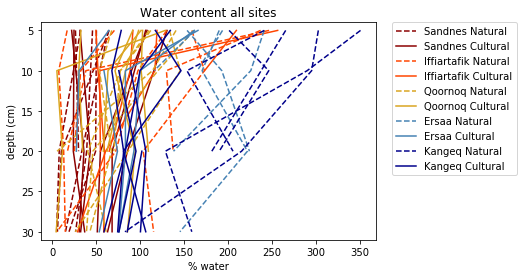

testing plotmode 2


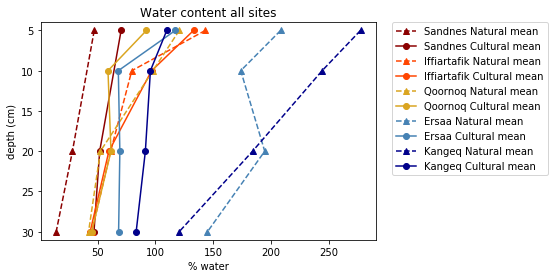

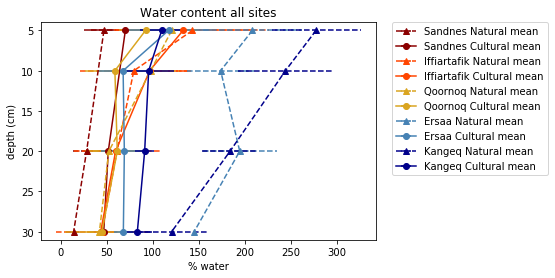

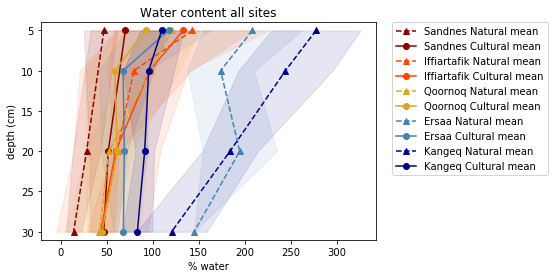

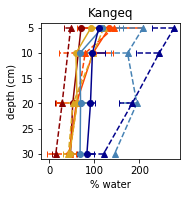

testing plotmode 3


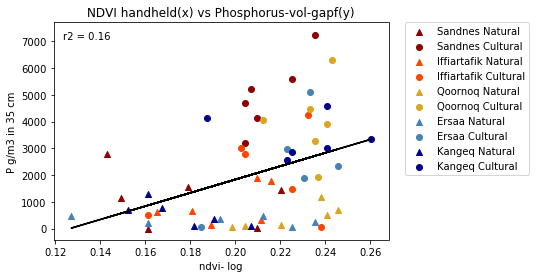

testing plotmode 4
variables without depth


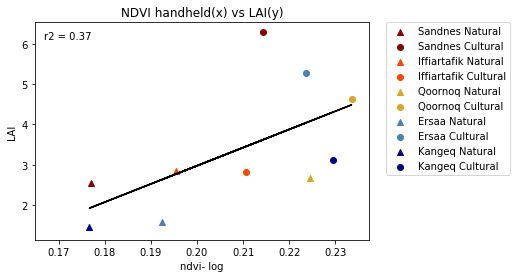

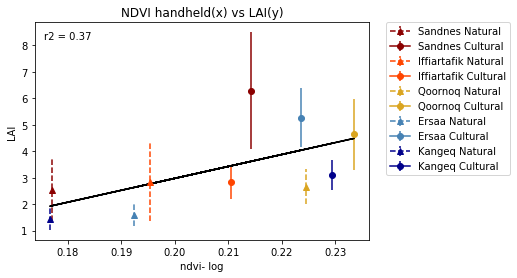

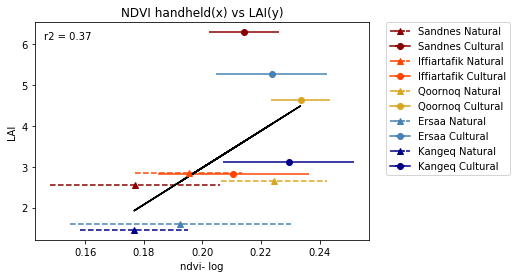

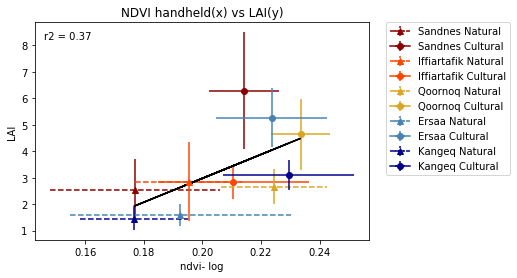

variables with depth


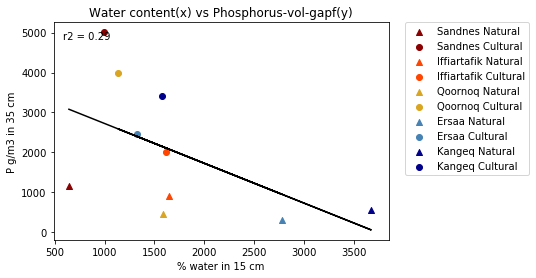

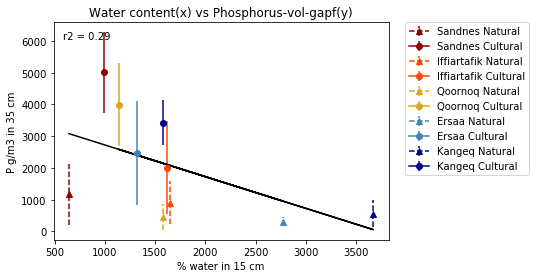

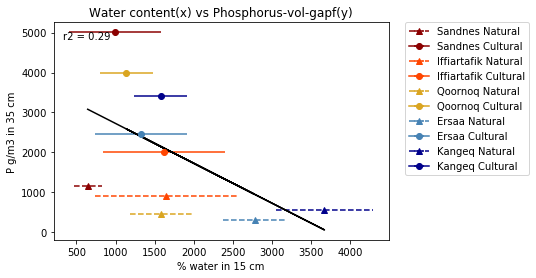

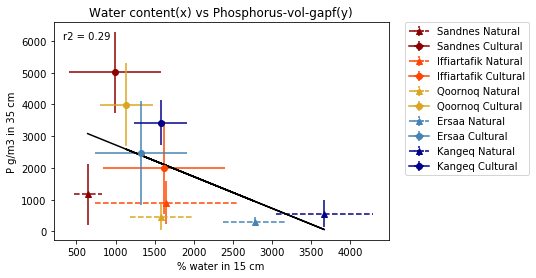

variables with and without depth


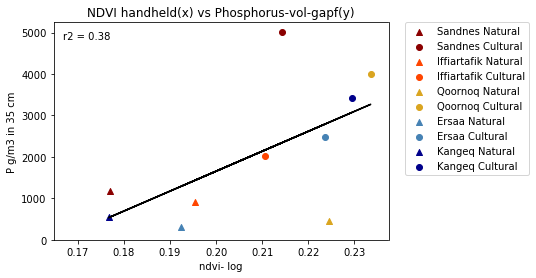

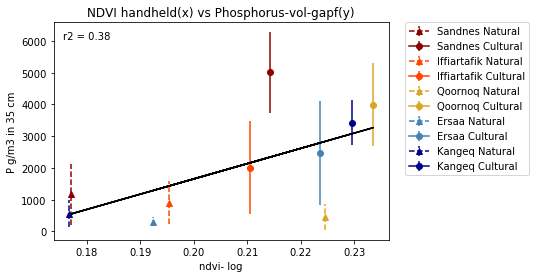

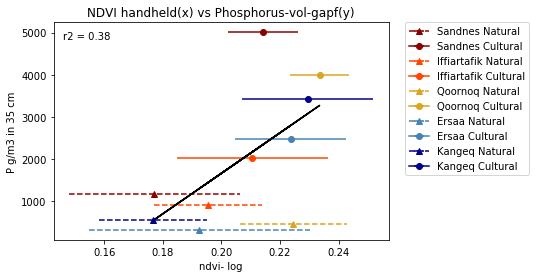

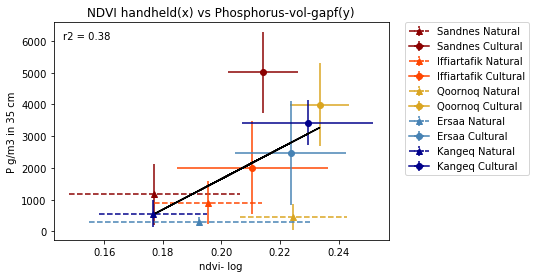

In [23]:
from testsfunc import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.41.xlsx'
runtest(inFile, savefig=False)
